In [111]:
import arviz as az
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

In [82]:
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")


In [83]:
random_seed = 1923
rng = np.random.default_rng(random_seed)

## Data generation

In [112]:
# Relationship
true_intercept = 5
true_slope = 2

# Predictor
n_obs = 500
x_mean = 10
x_sd = 2
x = rng.normal(x_mean, x_sd, n_obs)

# Target
cond_mean = true_intercept + true_slope * x
noise_mean = 0
noise_sd = x_mean / 2
noise = rng.normal(noise_mean, noise_sd, n_obs)
y = cond_mean + noise

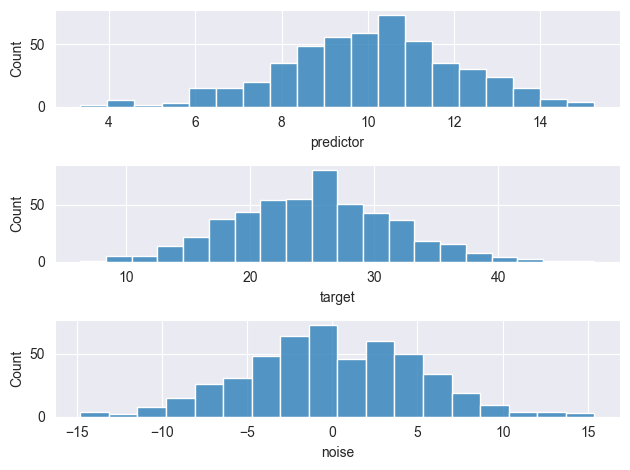

In [85]:
# Distributions of data
fig, ax = plt.subplots(3)

_ = sns.histplot(x, ax = ax[0])
_ = ax[0].set_xlabel("predictor")

_ = sns.histplot(y, ax = ax[1])
_ = ax[1].set_xlabel("target")

_ = sns.histplot(noise, ax = ax[2])
_ = ax[2].set_xlabel("noise")

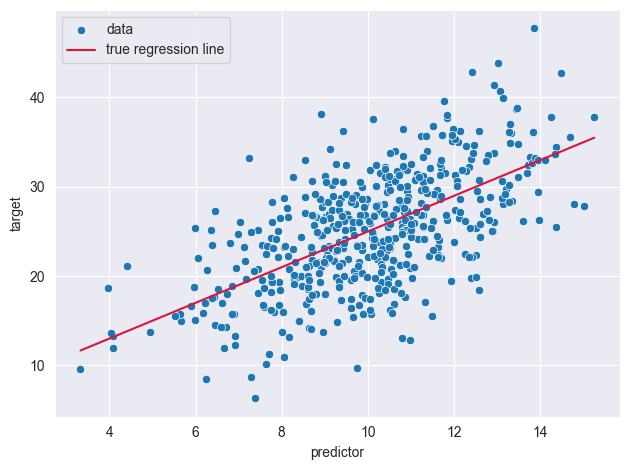

In [86]:
# True regression line
_ = sns.scatterplot(x = x, y = y, label = "data")
_ = sns.lineplot(x = x, y = cond_mean, label = "true regression line", color = "crimson")
_ = plt.xlabel("predictor")
_ = plt.ylabel("target")

## Flat prior


In [103]:
# Create model
flat_model = pm.Model()

In [104]:
# Define priors & likelihood
with flat_model:

    # Standard normal priors for all parameters
    intercept = pm.Normal("intercept", mu = 0, sigma = 1)
    slope = pm.Normal("slope", mu = 0, sigma = 1)
    error = pm.Normal("error", mu = 0, sigma = 1)

    # Expected value
    cond_mean = intercept + slope * x 

    # Likelihood
    likelihood = pm.Normal("outcome", mu = cond_mean, sigma = error, observed = y)

In [105]:
# Draw posterior samples
with flat_model:
    posterior = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, error]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


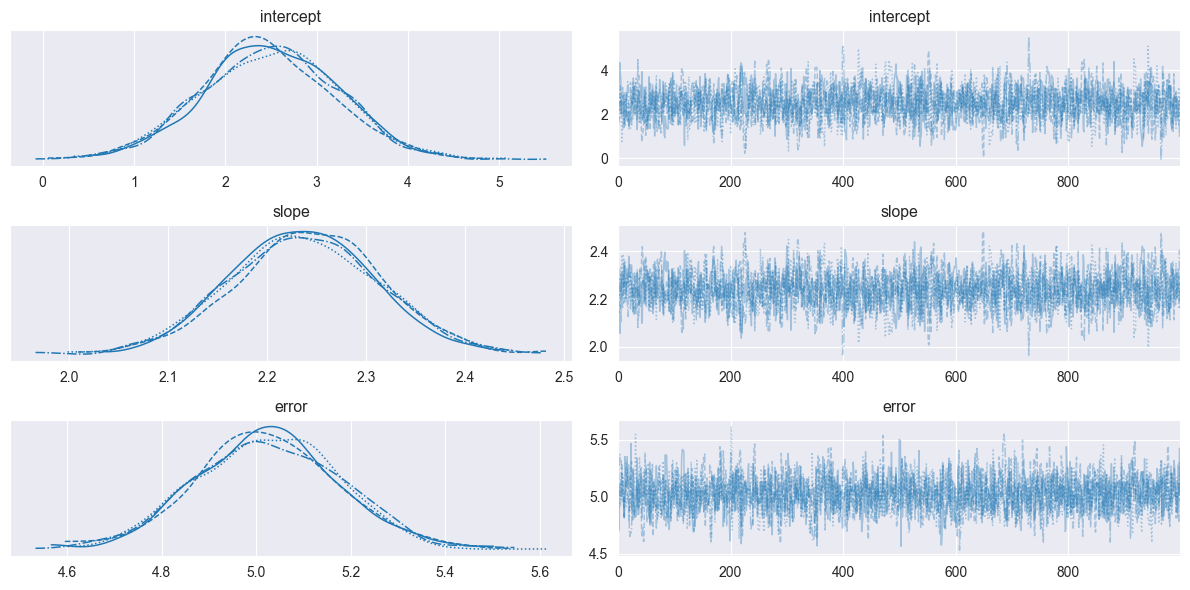

In [106]:
# Plot distribution & sampling chains
_ = az.plot_trace(posterior)

In [107]:
# Print posterior distribution summaries
az.summary(posterior, round_to = 4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,2.4811,0.7379,1.0562,3.8172,0.0192,0.0136,1478.3814,1586.8813,1.0013
slope,2.2382,0.0746,2.0946,2.3747,0.0019,0.0014,1498.3105,1622.7928,1.0033
error,5.0244,0.1535,4.7390,5.3090,0.0034,0.0024,1995.1727,1988.7922,1.0022


In [113]:
# Simulate posterior predictive regression lines
posterior.posterior["outcome"] = posterior.posterior["intercept"] + posterior.posterior["slope"] * xr.DataArray(x)

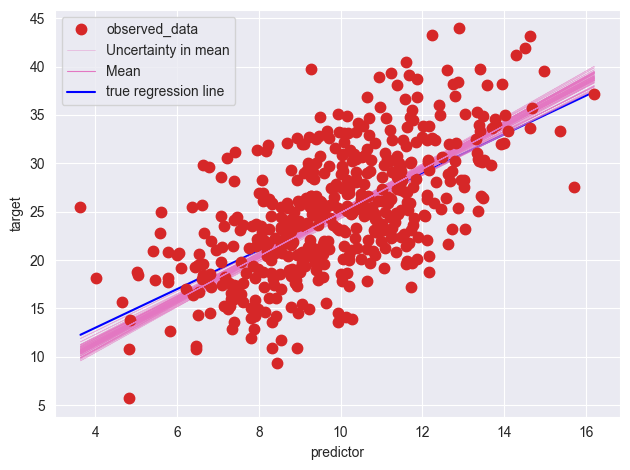

In [124]:
_ = az.plot_lm(
    idata = posterior, 
    x = x, # Predictor values
    y = y, # Real target
    y_model = "outcome" # Posterior predictive regression lines
)
_ = sns.lineplot(x = x, y = cond_mean, label = "true regression line", color = "blue")
_ = plt.xlabel("predictor")
_ = plt.ylabel("target")

## Weakly informative prior

In [ ]:
# Prior predictive check